# Lecture 6b: Neural Network Learning Part 4

3/23/2023

## Using Keras Library:
 
 - Multi Class Classification

#### Import Libraries:

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from random import randint
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.np_utils import to_categorical # Convert Class Vectors to Binary Class Matrices
from sklearn.metrics import accuracy_score, confusion_matrix

#### Define Functions For Plotting:

In [3]:
# plot training accuracy and loss
def plotCurve(trainingAccuracy, trainingLoss):
    epochs = np.arange(trainingLoss.shape[0])
    #print(epochs)
    plt.figure(figsize = [12, 6])
    plt.subplot(1, 2, 1)
    plt.plot(epochs, trainingAccuracy)
    #plt.axis([-1, 2, -1, 2])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs, trainingLoss)
    plt.xlabel('Epoch')
    plt.ylabel('Binary CrossEntropy Loss')
    plt.title('Training Loss')
    plt.show()

# Plot MNIST Images in subplots
def img_plt(img, label):
    plt.figure(figsize=(12, 5.5))
    for i in range (1, 11):
        plt.subplot(2, 5, i)
        plt.imshow(img[i - 1, :, :], cmap = 'gray')
        plt.title('Label: ' + str(label[i - 1]))
    plt.show()

# Plot Features of MNIST data
def feat_plot(features, labels, classes, title):
    for class_i in classes:
        plt.plot(features[labels[:] == classes[class_i], 0],
                 features[labels[:] == classes[class_i], 1], 'o', markersize = 5)
        # plt.axis([-2, 2, -2, 2])
        plt.xlabel('X: Feature 1')
        plt.ylabel('Y: Feature 2')
        plt.title(title)
        plt.legend(['Class ' + str(classes[class_i]) for class_i in classes])
    plt.show()

#### Define Function For Feature Extraction From MNIST Images:

In [4]:
def feat_extract_mult(images):
    width = images.shape[1]
    height = images.shape[2]
    features = np.zeros((images.shape[0], 4))

    features_temp = np.sum(images[:, 0:int(width / 2), 0:int(height / 2)], axis = 2) # Quadrant 0
    features[:,0] = np.sum(features_temp, axis = 1) / (width * height / 4) # Average Pixel Values
    
    features_temp = np.sum(images[:, 0:int(width / 2), int(height / 2):], axis = 2) # Quadrant 1
    features[:,1] = np.sum(features_temp, axis = 1) / (width * height / 4) # Average Pixel Values
    
    features_temp = np.sum(images[:, int(width / 2):, 0:int(height / 2)], axis = 2) # Quadrant 2
    features[:,2] = np.sum(features_temp, axis = 1) / (width * height / 4) # Average Pixel Values
    
    features_temp = np.sum(images[:, int(images.shape[1] / 2):, int(images.shape[2] / 2):], axis = 2) # Quadrant 3
    features[:,3] = np.sum(features_temp, axis = 1) / (width * height / 4) # Average Pixel Values
    return features

## Keras For Multiclass Classification:

#### Load MNIST Dataset & Split Into Training & Testing Sets:

In [5]:
# Load Data and Split to Training and Testing Sets:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#print(x_train.shape) # (60000, 28, 28)
#print(y_train.shape) # (60000,)
#print(x_test.shape) # (10000, 28, 28)
#print(y_test.shape) # (10000,)

print('The number of Training Images =', x_train.shape[0])
print('The number of Training Labels =', y_train.shape[0])
print('The size of each Training Image is:', x_train.shape[1], 'by', x_train.shape[2], 'pixels \n')
print('The number of Testing Images =', x_test.shape[0])
print('The number of Testing Labels =', y_test.shape[0])
print('The size of each Testing Image is:', x_test.shape[1], 'by', x_test.shape[2], 'pixels')

The number of Training Images = 60000
The number of Training Labels = 60000
The size of each Training Image is: 28 by 28 pixels 

The number of Testing Images = 10000
The number of Testing Labels = 10000
The size of each Testing Image is: 28 by 28 pixels


#### Plot Digits 0 - 9 From The Training Set:

 - For Each Digit, Select A Random Sample.

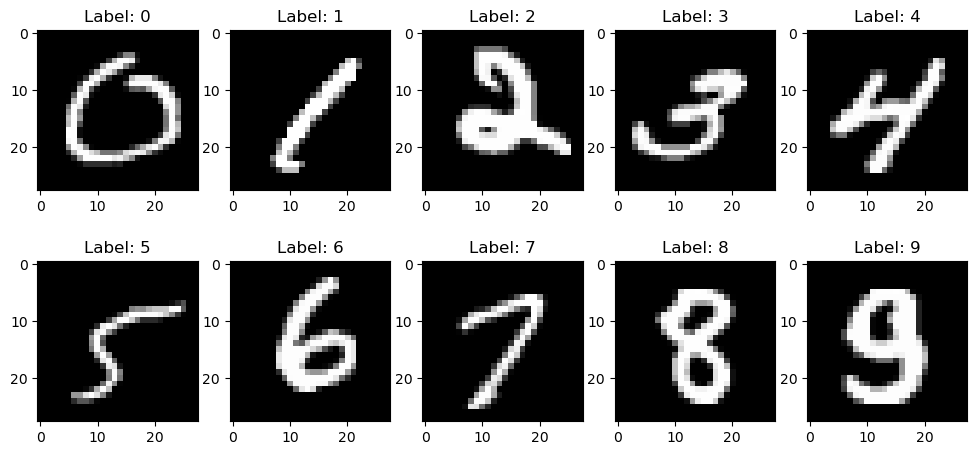

In [6]:
# Select 10 images from the training set
x_train_rnd = np.zeros((10, 28, 28))
y_train_rnd = np.arange(10)

for digit in range(10): # finds 10 images from the set
    x_train_d = x_train[y_train == digit,:,:]
    #x_train_rnd[digit,:,:] = x_train_d[0,:,:] # Select FIRST Digits From Set
    x_train_rnd[digit,:,:] = x_train_d[randint(0, x_train_d.shape[0]),:,:] # Select RANDOM Digits From Set

img_plt(x_train_rnd, y_train_rnd) # plot the images

#### Check Training and Test Sets For Proper Size:

In [7]:
# Check Training Data Set for correct amount of images:
x_train_TEST0 = x_train[y_train == 0] # Select all Zeros in Training Set
x_train_TEST1 = x_train[y_train == 1] # Select all Ones in Training Set
x_train_TEST2 = x_train[y_train == 2] # Select all Twos in Training Set
#print(x_train_TEST0.shape)
#print(x_train_TEST1.shape)
#print(x_train_TEST2.shape)

total1 = x_train_TEST0.shape[0] + x_train_TEST1.shape[0] + x_train_TEST2.shape[0] 
print(f'Total # of 0\'s, 1\'s & 2\'s in Training Set should be: {x_train_TEST0.shape[0]} + {x_train_TEST1.shape[0]} + {x_train_TEST2.shape[0]} = {total1}\n')

# Check Test Data Set for correct amount of images:
x_test_TEST0 = x_test[y_test == 0] # Select all Zeros in Testing Set
x_test_TEST1 = x_test[y_test == 1] # Select all Ones in Testing Set
x_test_TEST2 = x_test[y_test == 2] # Select all Ones in Testing Set
#print(x_test_TEST0.shape)
#print(x_test_TEST1.shape)
#print(x_test_TEST2.shape)

total2 = x_test_TEST0.shape[0] + x_test_TEST1.shape[0] + x_test_TEST2.shape[0]
print(f'Total # of 0\'s, 1\'s & 2\'s in Test Set should be: {x_test_TEST0.shape[0]} + {x_test_TEST1.shape[0]} + {x_test_TEST2.shape[0]} = {total2}\n')

Total # of 0's, 1's & 2's in Training Set should be: 5923 + 6742 + 5958 = 18623

Total # of 0's, 1's & 2's in Test Set should be: 980 + 1135 + 1032 = 3147



### Select MNIST Digits 0, 1 and 2:
 
 - Select All 0's, 1's & 2's From Training & Testing Sets.
 - Create an array of the images.
 - Create a 2nd array of labels for the images.

In [8]:
# Create a boolean mask to select images of digits 0, 1, and 2
train_mask_012 = np.isin(y_train, [0, 1, 2])

# Use boolean indexing to select the corresponding images and labels
x_train_012 = x_train[train_mask_012]
y_train_012 = y_train[train_mask_012]

#print(x_train_012.shape) # debug
#print(y_train_012.shape) # debug
print(f'Total Number of 0\'s, 1\'s & 2\'s in \'x_train_012\' is: {x_train_012.shape[0]}\n')

test_mask_012 = np.isin(y_test, [0, 1, 2])

# Use boolean indexing to select the corresponding images and labels
x_test_012 = x_test[test_mask_012]
y_test_012 = y_test[test_mask_012]

#print(x_test_012.shape) # debug
#print(y_test_012.shape) # debug
print(f'Total Number of 0\'s, 1\'s & 2\'s in \'x_test_012\' is: {x_test_012.shape[0]}\n')

Total Number of 0's, 1's & 2's in 'x_train_012' is: 18623

Total Number of 0's, 1's & 2's in 'x_test_012' is: 3147



#### Plot Random Images From New Testing and Training Sets:

Random Images From Training Set: 



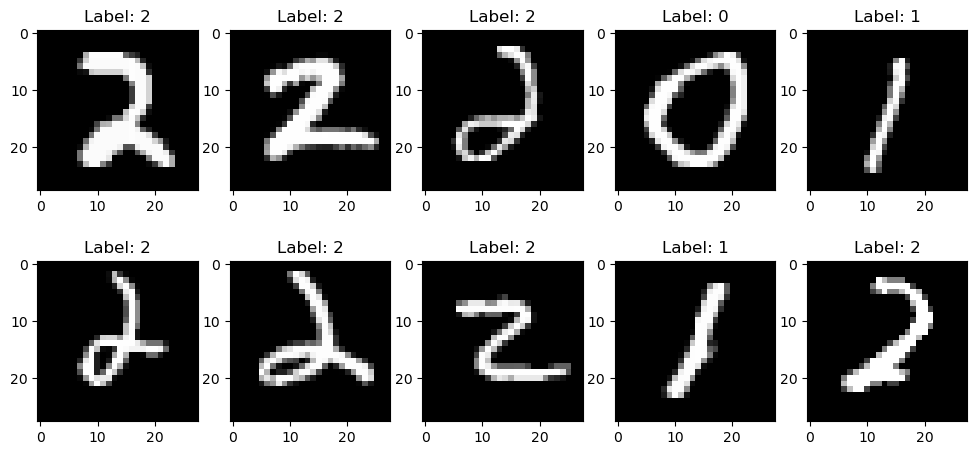

Random Images From Testing Set: 



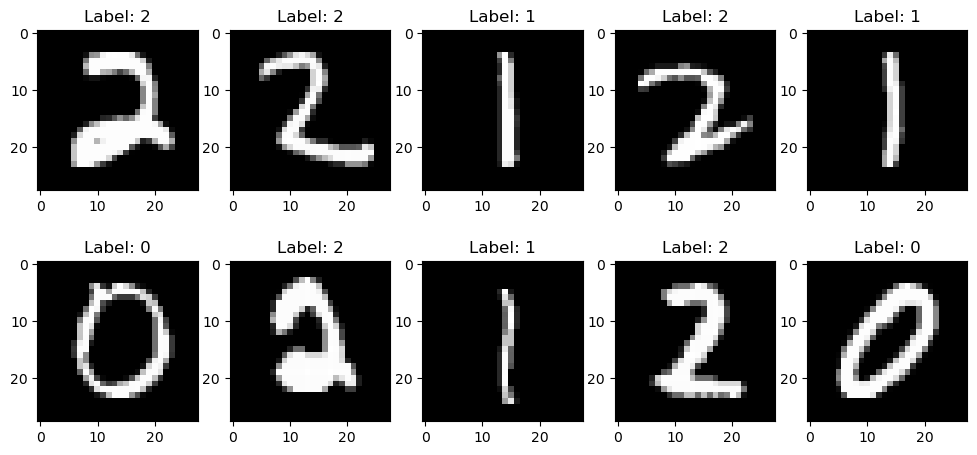

In [9]:
# Select 10 random images and their labels from x_train_012 and y_train_012
rnd_indices = np.random.choice(x_train_012.shape[0], size=10, replace=False)
rnd_images = x_train_012[rnd_indices]
rnd_labels = y_train_012[rnd_indices]

print('Random Images From Training Set: \n')
img_plt(rnd_images, rnd_labels)

rnd_indices2 = np.random.choice(x_test_012.shape[0], size=10, replace=False)
rnd_images2 = x_test_012[rnd_indices2]
rnd_labels2 = y_test_012[rnd_indices2]

print('Random Images From Testing Set: \n')
img_plt(rnd_images2, rnd_labels2)

#### Divide Training Set Into Training and Validation Sets

 - Create Shuffled Array Indices.
 - Shuffle Training and Testing Data.
 - Pull 1st 500 Images from Training Set and Designate as Validation Set.
    - The Remainder Of The Training Set is the New Training Set.

In [10]:
# create array with 11774 indices for TRAINING:
train_indices = np.arange(0, x_train_012.shape[0])
#print(train_indices)

# create array with 1954 indices for TESTING:
test_indices = np.arange(0, x_test_012.shape[0])
#print(test_indices, '\n')

# shuffle the indices of the training array
shuffled_indices_train = np.random.permutation(train_indices)
#print(shuffled_indices_train)

# shuffle the indices of the testing array
shuffled_indices_test = np.random.permutation(test_indices)
#print(shuffled_indices_test, '\n')

# create arrays of SHUFFLED TRAINING data
x_shuffled_all_train = x_train_012[shuffled_indices_train,:,:]
y_shuffled_all_train = y_train_012[shuffled_indices_train]
#print(x_shuffled_all_train.shape)
#print(y_shuffled_all_train.shape, '\n')

# create arrays of SHUFFLED TESTING data
x_shuffled_all_test = x_test_012[shuffled_indices_test,:,:]
y_shuffled_all_test = y_test_012[shuffled_indices_test]
#print(x_shuffled_all_test.shape)
#print(y_shuffled_all_test.shape, '\n')

# create validation set of 500 random images FROM SHUFFLED training set
x_valid_012 = x_shuffled_all_train[0:500,:,:]
y_valid_012 = y_shuffled_all_train[0:500]
print(x_valid_012.shape)
print(y_valid_012.shape, '\n')

# pull the rest of the images (11774 - 500 = 11274) FROM SHUFFLED training set
x_train_012 = x_shuffled_all_train[500:,:,:]
y_train_012 = y_shuffled_all_train[500:]
print(x_train_012.shape)
print(y_train_012.shape, '\n')

# SHUFFLE the TESTING Set
x_test_012 = x_shuffled_all_test[:]
y_test_012 = y_shuffled_all_test[:]
print(x_test_012.shape)
print(y_test_012.shape)

(500, 28, 28)
(500,) 

(18123, 28, 28)
(18123,) 

(3147, 28, 28)
(3147,)


#### Check Number Of Images In Training, Testing and Validation Sets:

In [11]:
print(f'The number of images in \'x_train_012\' Training Set = {x_train_012.shape[0]}')
print(f'The number of labels in \'y_train_012\' Training Set = {y_train_012.shape[0]}\n')

print(f'The number of images in \'x_valid_012\' Validation Set = {x_valid_012.shape[0]}')
print(f'The number of labels in \'y_valid_012\' Validation Set = {y_valid_012.shape[0]}\n')

print(f'The number of images in \'x_test_012\' Testing Set = {x_test_012.shape[0]}')
print(f'The number of labels in \'y_test_012\' Testing Set = {y_test_012.shape[0]}')

The number of images in 'x_train_012' Training Set = 18123
The number of labels in 'y_train_012' Training Set = 18123

The number of images in 'x_valid_012' Validation Set = 500
The number of labels in 'y_valid_012' Validation Set = 500

The number of images in 'x_test_012' Testing Set = 3147
The number of labels in 'y_test_012' Testing Set = 3147


#### Plot 10 Images From The Validation Set:
 - These indices are now randomized

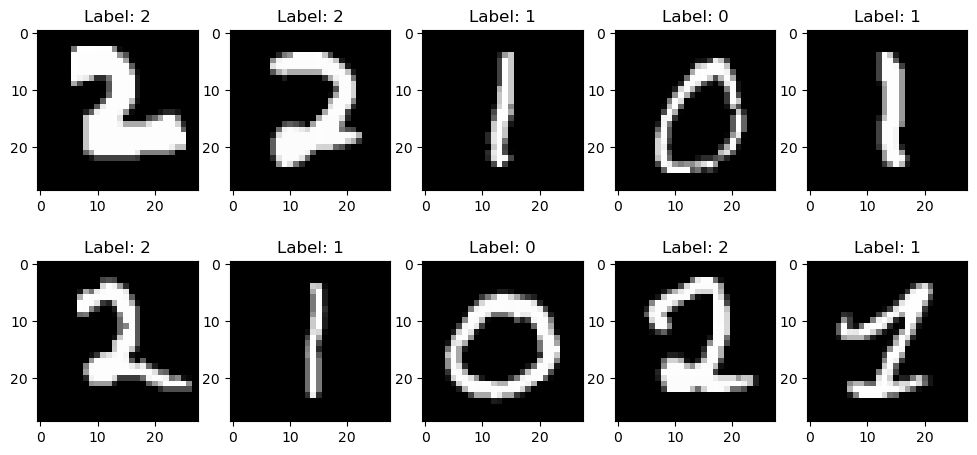

In [12]:
img_plt(x_valid_012[0:10,:,:], y_valid_012[0:10]) # Select First 10 images from the set

#### Extract And Plot Features of 500 Training Images:

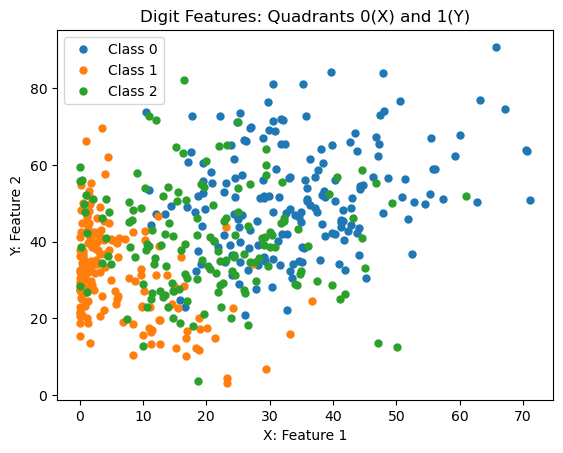

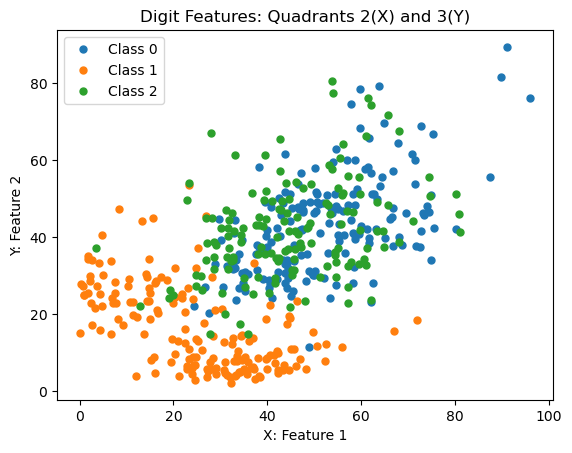

In [13]:
classes2 = [0, 1, 2]
feature_train2 = feat_extract_mult(x_train_012)
feature_valid2 = feat_extract_mult(x_valid_012)
feature_test2 = feat_extract_mult(x_test_012)

feat_plot(feature_train2[0:500, 0:2], y_train_012[0:500], classes2, 'Digit Features: Quadrants 0(X) and 1(Y)')
feat_plot(feature_train2[0:500, 2:4], y_train_012[0:500], classes2, 'Digit Features: Quadrants 2(X) and 3(Y)')

#### Define Model For Multiclass Classification:
 
 - Hidden Layer 1: 4 features (1 per image quadrant).
 - Hidden Layer 2: 16 neurons.
 - Output Layer: 3 neurons (1 per class).
     - Softmax is used for multiclass classification.
     - Output of Softmax is a vector of probabilities according to class identification: 
$$
  P(x_n) = 
  \begin{bmatrix}
    P(x_0)\\
    P(x_1)\\
    P(x_2)
  \end{bmatrix}
$$

In [15]:
model2 = Sequential()
model2.add(Dense(input_dim = 4, units = 256, activation = 'tanh')) # Hidden Layer 1 (also try 'relu' activation)
model2.add(Dense(units = 16, activation = 'tanh')) # Hidden Layer 2 (also try 'relu' activation)
model2.add(Dense(units = len(classes2), activation = 'softmax')) # Output Layer
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               1280      
                                                                 
 dense_4 (Dense)             (None, 16)                4112      
                                                                 
 dense_5 (Dense)             (None, 3)                 51        
                                                                 
Total params: 5,443
Trainable params: 5,443
Non-trainable params: 0
_________________________________________________________________


#### Compile & Fit The Model:

In [16]:
y_train_012_c = to_categorical(y_train_012, len(classes2))
y_valid_012_c = to_categorical(y_valid_012, len(classes2))
y_test_012_c = to_categorical(y_test_012, len(classes2))

opt2 = tf.keras.optimizers.SGD(learning_rate = 0.0001) # Stochastic Gradient Descent
model2.compile(loss='categorical_crossentropy', optimizer=opt2, metrics=['accuracy'])

history2 = model2.fit(feature_train2, y_train_012_c, batch_size=16, epochs=50, verbose=1)

Epoch 1/50
1133/1133 [==============================] - 1s 843us/step - loss: 0.9022 - accuracy: 0.6919
Epoch 2/50
1133/1133 [==============================] - 1s 900us/step - loss: 0.5416 - accuracy: 0.8669
Epoch 3/50
1133/1133 [==============================] - 1s 933us/step - loss: 0.4590 - accuracy: 0.8764
Epoch 4/50
1133/1133 [==============================] - 1s 1ms/step - loss: 0.4214 - accuracy: 0.8809
Epoch 5/50
1133/1133 [==============================] - 1s 918us/step - loss: 0.3973 - accuracy: 0.8841
Epoch 6/50
1133/1133 [==============================] - 1s 864us/step - loss: 0.3801 - accuracy: 0.8867
Epoch 7/50
1133/1133 [==============================] - 1s 896us/step - loss: 0.3671 - accuracy: 0.8883
Epoch 8/50
1133/1133 [==============================] - 1s 888us/step - loss: 0.3571 - accuracy: 0.8896
Epoch 9/50
1133/1133 [==============================] - 1s 1ms/step - loss: 0.3487 - accuracy: 0.8898
Epoch 10/50
1133/1133 [==============================] - 1s 1ms/step

#### Evaluate Model & Plot Training Accuracy and Loss:

99/99 [==============================] - 0s 824us/step - loss: 0.2980 - accuracy: 0.8875

Total Loss From Test Set:  0.2979833781719208
Accuracy of Test Set:  0.8875119090080261 

16/16 [==============================] - 0s 923us/step - loss: 0.3010 - accuracy: 0.8980

Total Loss From Validation Set:  0.3010430932044983
Accuracy of Validation Set:  0.8980000019073486 



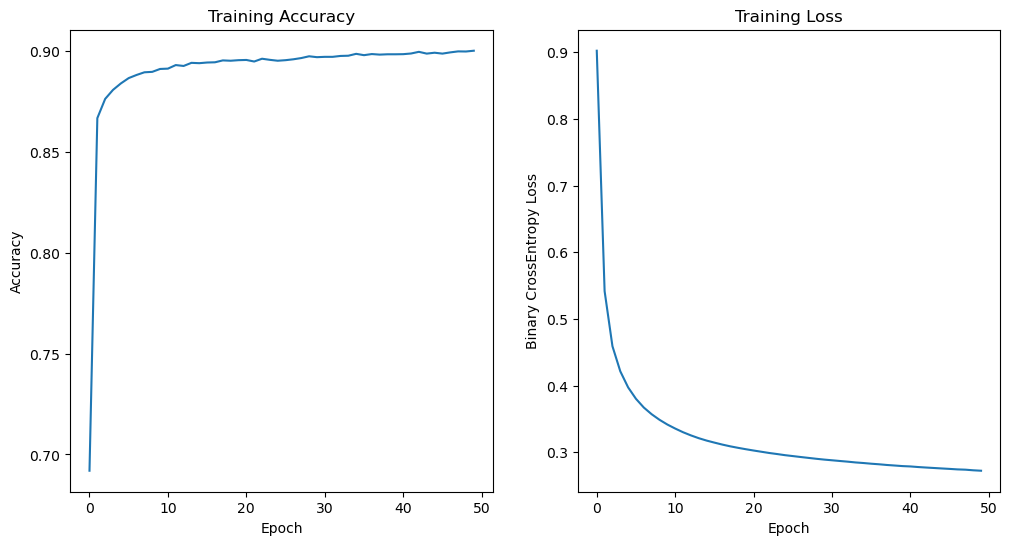

In [17]:
scoreTest2 = model2.evaluate(feature_test2, y_test_012_c)
print('\nTotal Loss From Test Set: ', scoreTest2[0])
print('Accuracy of Test Set: ', scoreTest2[1], '\n')

scoreValid2 = model2.evaluate(feature_valid2, y_valid_012_c)
print('\nTotal Loss From Validation Set: ', scoreValid2[0])
print('Accuracy of Validation Set: ', scoreValid2[1], '\n')

accuracyCurve2 = np.array(history2.history['accuracy'])
lossCurve2 = np.array(history2.history['loss'])
plotCurve(accuracyCurve2, lossCurve2)

#### Predict Class Of Held Out Samples & Calculate Evaluation Metrics:

 - np.argmax: determine highest value of each row (image) per column (class)
     - This will predict which class each image belongs to.

In [18]:
testClass2Prob = model2.predict(feature_test2)
testLabels2 = np.argmax(testClass2Prob, axis = 1)

testAccuracy2 = accuracy_score(testLabels2, y_test_012)
print('\nThe Accuracy Using The Test Set = ', testAccuracy2)

colLabels = ['Predicted 0\'s', 'Predicted 1\'s', 'Predicted 2\'s']
rowLabels = ['Actual 0\'s', 'Actual 1\'s', 'Actual 2\'s']

confusionMatrix2 = confusion_matrix(testLabels2, y_test_012)
fancyMatrix = pd.DataFrame(confusionMatrix2, columns=colLabels, index=rowLabels,)

print('\nThe Confusion Matrix Using Testing Set Is:\n')

display(fancyMatrix)

99/99 [==============================] - 0s 725us/step

The Accuracy Using The Test Set =  0.8875119161105816

The Confusion Matrix Using Testing Set Is:



,Predicted 0's,Predicted 1's,Predicted 2's
Actual 0's,914,26,193
Actual 1's,9,1086,46
Actual 2's,57,23,793
